In [492]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

<ipython-input-493-de66bb0fd666>:2: DeprecationWarning: This function is deprecated. Please call randint(0, 60000 + 1) instead
  start = np.random.random_integers(low=0, high=x_train.shape[0], size=(1,))[0]


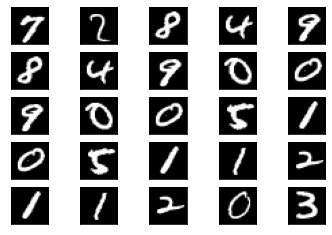

In [493]:
side = 5
start = np.random.random_integers(low=0, high=x_train.shape[0], size=(1,))[0]
fig, ax = plt.subplots(side, side)
for a in range(side):
    for b in range(side):
        ax[a, b].axes.xaxis.set_visible(False)
        ax[a, b].axes.yaxis.set_visible(False)
        ax[a, b].imshow(x_train[2 * a + b + start, :, :], cmap='gray')
plt.show()

In [494]:
print("x_train:", x_train.shape)
x_train = x_train.reshape(x_train.shape[0], -1).T
print("x_train flatten:", x_train.shape)
print("y_train:", y_train.shape)
y_train = y_train.reshape(y_train.shape[0],1).T
print("y_train:", y_train.shape)

x_train: (60000, 28, 28)
x_train flatten: (784, 60000)
y_train: (60000,)
y_train: (1, 60000)


## Code

## Import

In [495]:
import numpy as np

## Normalization

In [496]:
x_train = x_train/255
x_test = x_test/255

## initialize_parameters

In [505]:
def initialize_parameters(layers_dims):
    parameters = {}
    L = len(layers_dims) - 1
        
    for l in range(1, L+1):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b'+str(l)] = np.ones((layers_dims[l], 1))
    
    return parameters

## activation_funtion

In [498]:
def activation_funtion(Z, activation):
    if activation == "relu":
        print("activation:", activation)
        return np.maximum(np.zeros(1), Z)
        
    if activation == "sigmoid":
        print("activation:", activation)
        return 1 / (1 + np.exp(-Z))
    
    print("activation: linear")
    return Z

## forward_propagation

In [499]:
def forward_propagation(X, parameters, activation):
    cache = {}
    L = len(parameters) // 2
    cache['A0'] = X
    
    for l in range(1,L):
        cache['Z'+str(l)] = np.dot(parameters['W'+str(l)], cache['A'+str(l-1)]) + parameters['b'+str(l)]
        cache['A'+str(l)] = activation_funtion(cache['Z'+str(l)], activation[l-1])

    l += 1
    
    cache['Z'+str(l)] = np.dot(parameters['W'+str(l)], cache['A'+str(l-1)]) + parameters['b'+str(l)]
    cache['A'+str(l)] = activation_funtion(cache['Z'+str(l)], activation[l-1])
    
    return cache

## compute_cost

In [500]:
def compute_cost(AL,Y, loss):
    m = Y.shape[1]
    
    AL = AL.T
    if loss == "cross_entropy":
        epsilon = 1e-10
        cost = -(1/m) * np.sum(np.multiply(np.log(AL + epsilon), Y) + np.multiply(np.log(1-AL + epsilon), 1-Y))
        return np.squeeze(cost)


In [526]:
def activation_derivative(Z, activation):
    if activation == "relu":
        dZ = np.ones(Z.shape)
        return (dZ >= 0).astype(int)
        
    if activation == "sigmoid":
        return np.multiply(activation_funtion(Z, "sigmoid"), (1- activation_funtion(Z, "sigmoid")))
    
    return Z

## back_propagation

In [527]:
def back_propagation(X, Y, parameters, cache, activation):
    grads = {}
    L = len(parameters) // 2
    m = Y.shape[1]
    
    grads["dZ" + str(L)] = cache['A' + str(L)] - Y
    grads["dW" + str(L)] = (1/m) * np.dot(grads["dZ" + str(L)], cache['A' + str(L-1)].T)
    grads["db" + str(L)] = (1/m) * np.sum(grads["dZ" + str(L)], axis= 1, keepdims= True)
    
    for l in range(L-1,1,-1):
        grads["dZ" + str(l)] = np.multiply(np.dot(parameters["W" + str(l+1)].T, grads["dZ" + str(l+1)]), activation_derivative(cache["Z" + str(l)],activation[l-1]))        
        grads["dW" + str(l)] = (1/m) * np.dot(cache['A' + str(l-1)], grads["dZ" + str(l)].T)
        grads["db" + str(l)] = (1/m) * np.sum(grads["dZ" + str(l)], axis= 1, keepdims= True)
    l -= 1
    
    grads["dZ" + str(l)] = np.multiply(np.dot(parameters["W" + str(l+1)].T, grads["dZ" + str(l+1)]), activation_derivative(cache["Z" + str(l)],activation[l-1]))
    grads["dW" + str(l)] = (1/m) * np.dot(cache['A' + str(l-1)], grads["dZ" + str(l)].T)
    grads["db" + str(l)] = (1/m) * np.sum(grads["dZ" + str(l)], axis= 1, keepdims= True)
    
    return grads

In [528]:
layers_dims = [x_train_flatten.shape[0],32,16,10]
activation = ["relu","relu","sigmoid"]
loss_funtion = "cross_entropy"

print(y_train.shape)

parameters = initialize_parameters(layers_dims)

cache = forward_propagation(x_train_flatten, parameters, activation)

cost = compute_cost(cache['A' + str(len(parameters) // 2)].T, y_train, loss_funtion)

print("cost:",cost)

(1, 60000)
activation: relu
activation: relu
activation: sigmoid
cost: 3533.9805322670554


In [529]:
layers_dims = [5,5,2,4] # 3NN
activation = ["relu","relu","sigmoid"] # 3 Activation to 3NN
loss_funtion = "cross_entropy"

X = np.random.randn(layers_dims[0],1) * 10
Y = np.array([[0]])

parameters = initialize_parameters(layers_dims)

cache = forward_propagation(X, parameters, activation)

cost = compute_cost(cache['A' + str(len(parameters) // 2)].T, Y, loss_funtion)

grads = back_propagation(X, Y, parameters, cache, activation)


activation: relu
activation: relu
activation: sigmoid
{'dZ3': array([[0.99999639],
       [0.00264643],
       [0.99988382],
       [0.89480874]]), 'dW3': array([[6.36704218e+00, 1.71243669e+00],
       [1.68500175e-02, 4.53186697e-03],
       [6.36632543e+00, 1.71224392e+00],
       [5.69730556e+00, 1.53230885e+00]]), 'db3': array([[0.99999639],
       [0.00264643],
       [0.99988382],
       [0.89480874]]), 'dZ2': array([[3.19799271],
       [0.13538042]]), 'dW2': array([[ 1.12774193,  0.04774063],
       [ 0.84411792,  0.03573399],
       [29.74536824,  1.25920875],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]]), 'db2': array([[3.19799271],
       [0.13538042]]), 'dZ1': array([[ 0.83642885],
       [-1.90891761],
       [ 1.87815273],
       [-1.39911307],
       [-3.53129292]]), 'dW1': array([[  4.42842239, -10.10664981,   9.94376704,  -7.40752025,
        -18.69621864],
       [ -4.24712576,   9.69289039,  -9.53667593,   7.10426137,
         17.93080808],
